In [34]:
import sys
print('pyhton: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
import numpy
print('numpy: {}'.format(numpy.__version__))
import pandas
print('pandas: {}'.format(pandas.__version__))
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

pyhton: 3.7.1 (default, Oct 28 2018, 08:39:03) [MSC v.1912 64 bit (AMD64)]
scipy: 1.2.1
numpy: 1.18.1
pandas: 0.24.2
matplotlib: 2.2.2
sklearn: 0.21.2


In [49]:
#importing dependencies
import pandas
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils.multiclass import type_of_target
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [65]:
#loding the dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal_length','sepal_width','petal_length','class']
dataset = read_csv(url, names =names)

In [66]:
#dimension of dataset
print(dataset.shape)

(150, 4)


In [67]:
#take a look at the data
print(dataset.head())

     sepal_length  sepal_width  petal_length        class
5.1           3.5          1.4           0.2  Iris-setosa
4.9           3.0          1.4           0.2  Iris-setosa
4.7           3.2          1.3           0.2  Iris-setosa
4.6           3.1          1.5           0.2  Iris-setosa
5.0           3.6          1.4           0.2  Iris-setosa


In [68]:
#statistical summary
print(dataset.describe())

       sepal_length  sepal_width  petal_length
count    150.000000   150.000000    150.000000
mean       3.054000     3.758667      1.198667
std        0.433594     1.764420      0.763161
min        2.000000     1.000000      0.100000
25%        2.800000     1.600000      0.300000
50%        3.000000     4.350000      1.300000
75%        3.300000     5.100000      1.800000
max        4.400000     6.900000      2.500000


In [69]:
#class dsitribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


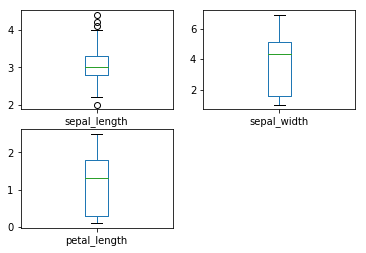

In [70]:
#univariate plots = box and whisker plot
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
pyplot.show()

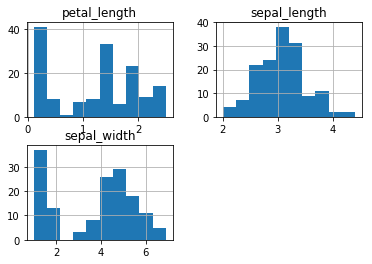

In [71]:
#histogram of the variable
dataset.hist()
pyplot.show()

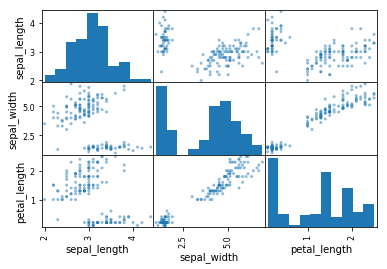

In [72]:
#multivariate plots
scatter_matrix(dataset)
pyplot.show()

In [73]:
#creating validation set
#splitting dataset
array = dataset.values
X = array[:, 0:2]
y = array[:, 2]
X_train,X_validation,Y_train,Y_validation=train_test_split(X,y,test_size=0.2,random_state=1)

In [74]:
#building models
models = []
models.append(('LR',LogisticRegression(solver='liblinear' , multi_class='over')))
models.append(('LDA' , LinearDiscriminantAnalysis))
models.append(('KNN' , KNeighborsClassifier))
models.append(('NB' , GaussianNB()))
models.append(('SVM' , SVC(gamma='auto')))

In [75]:
#evaluate the created models
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'unknown' instead.

ValueError: Dimensions of labels and X must be compatible

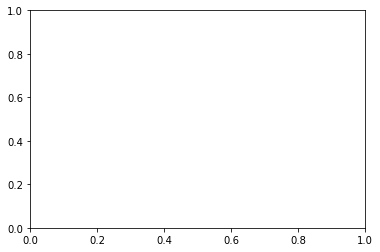

In [76]:
#compare our model
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparision')
pyplot.show()

In [62]:
#make prediction on svm
model = SVC(gamma='auto')
model.fit(X_train,Y_train)
prediction = model.predict(X_validation)

ValueError: Unknown label type: 'unknown'

In [ ]:
#evaluate out prediction
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))